### Write a function to check if a given number is prime or not, call the function for few sample numbers and record the output

In [130]:
import math
class Error(Exception):
    pass
class NotPrime(Error):
    pass
def checkPrime(n):
    try:
        if n==1:
            raise NotPrime
        if n%2 ==0 and n>2:
            return False
        for i in range(3,int(math.sqrt(n))+1,2):
            if n%i == 0:
                return False
        return True
    except NotPrime:
        print("1 is not prime")

In [131]:
checkPrime(9)

False

In [132]:
checkPrime(67)

True

In [133]:
checkPrime(1)

1 is not prime


### Write a function to check if the year is leap or not, call the function for few sample years and record the output

In [134]:
def checkLeap(year):
    if (year % 4) ==0:
        if(year%100) ==0:
            if(year%400)==0:
                print("{0} is a leap year".format(year))
            else:
                print("{0} is not a leap year".format(year))
        else:
            print("{0} is a leap year".format(year))
    else:
        print("{0} is not a leap year".format(year))

In [135]:
checkLeap(2001)

2001 is not a leap year


In [136]:
checkLeap(1900)

1900 is not a leap year


##### Hint : 
        The year can be evenly divided by 4, is a leap year, unless:
            The year can be evenly divided by 100, it is NOT a leap year, unless:
                    The year is also evenly divisible by 400. Then it is a leap year.

### Download the brazilian-ecommerce dataset from the link https://www.kaggle.com/olistbr/brazilian-ecommerce, the link needs you to login o kaggle to download the dataset. Extract the CSV files out of it

### Import Pandas and read the orders, customers and review datasets into individual dataframes

In [137]:
import pandas as pd
import numpy as np


In [138]:
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
review =pd.read_csv('olist_order_reviews_dataset.csv')
orders.head(5)
#customers.head(5)
#review.head(5)



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### From the orders dataset, Display the number of NULL values in each field

In [139]:
null_cols=orders.columns[orders.isnull().any()]# list of columns having nulls 
orders.isnull().sum()# Number of nulls in each column


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### From the orders dataset, find out the number of orders per each order status

In [140]:
#orders.info()
orders['order_status'].value_counts()


delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### From the orders dataset, find out the number of orders delivered before the estimated delivery date

In [141]:
#type(orders['order_estimated_delivery_date'][1]) # is a string
#type(orders['order_delivered_customer_date'][1]) # is a string
orders['order_delivered_customer_date']=pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])
orders_delivered_date_wo_null = orders[orders['order_delivered_customer_date'].notnull()]

sum(orders_delivered_date_wo_null['order_delivered_customer_date']<orders_delivered_date_wo_null['order_estimated_delivery_date'])

88649

### From the orders and customers dataset, find out the top 5 states where customers placed maximum number of orders

In [142]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [143]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [144]:
orders['customer_id'].nunique()
customers['customer_id'].nunique()

orders_customers = pd.merge(orders,customers,left_on='customer_id',right_on='customer_id')
top_state_max_orders = orders_customers['customer_state'].value_counts().nlargest(5)
top_state_max_orders

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_state, dtype: int64

### For the top state from above answer, find out the percentage ratio for each order status

In [145]:
total_val = orders_customers[orders_customers['customer_state']=='SP']['order_status'].count()
total_val

41746

In [146]:
def calc(x):
    return (x/total_val)*100

In [147]:
per_ratio_order_status = pd.DataFrame(orders_customers[orders_customers['customer_state']=='SP']['order_status'].value_counts())
per_ratio_order_status['%ratio']=per_ratio_order_status.apply(calc)
per_ratio_order_status

,order_status,%ratio
delivered,40501,97.017678
shipped,328,0.785704
canceled,327,0.783309
unavailable,292,0.699468
invoiced,160,0.383270
processing,136,0.325780
created,1,0.002395
approved,1,0.002395


### Draw suitable graph using matplotlib to represent above answer

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
per_ratio_order_status.reset_index(inplace=True)

In [151]:
per_ratio_order_status

,index,order_status,%ratio
0,delivered,40501,97.017678
1,shipped,328,0.785704
2,canceled,327,0.783309
3,unavailable,292,0.699468
4,invoiced,160,0.383270
5,processing,136,0.325780
6,created,1,0.002395
7,approved,1,0.002395


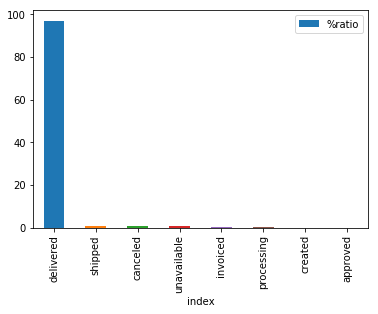

In [152]:
x = per_ratio_order_status['index']
y = per_ratio_order_status['%ratio']
per_ratio_order_status.plot(x='index',y='%ratio',kind='bar')
plt.show()

### In the orders dataset, Derive year, month and day from the the column "order_purchase_timestamp" using apply() function

In [153]:
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_delivered_customer_date'])
orders['year'] = orders['order_purchase_timestamp'].apply(lambda x: x.year)
orders['month'] = orders['order_purchase_timestamp'].apply(lambda x: x.month)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
orders['day'] = orders['order_purchase_timestamp'].apply(lambda x:x.dayofweek)
orders['day'] = orders['day'].map(dmap)
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017.0,10.0,Tue
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018.0,8.0,Tue
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018.0,8.0,Fri
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017.0,12.0,Sat
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018.0,2.0,Fri


### Drop the column "order_approved_at" from orders dataset

In [157]:
orders.drop(['order_approved_at'],axis=1,inplace=True)
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017.0,10.0,Tue
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018.0,8.0,Tue
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018.0,8.0,Fri
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017.0,12.0,Sat
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018.0,2.0,Fri


### From the three datasets, find out the top 5 cities where customers gave minimum review score

In [158]:
#review['review_score'].value_counts()
orders_customers_review = pd.merge(orders_customers,review,on='order_id')
min_review_score = orders_customers_review.groupby('customer_city').min()['review_score']
min_review_cities = min_review_score.nsmallest(5)
min_review_cities = pd.DataFrame(min_review_cities)
min_review_cities

,review_score
customer_city,
abaete,1
abaetetuba,1
abare,1
abatia,1
abelardo luz,1


### Export all the orders from order datasets for above 5 cities into a csv file

In [160]:
min_review_cities.reset_index(inplace=True)
list_min_reviews_cities = min_review_cities['customer_city'].tolist()
list_min_reviews_cities

['abaete', 'abaetetuba', 'abare', 'abatia', 'abelardo luz']

In [161]:
orders_min_review_cities = orders_customers[orders_customers['customer_city'].isin(list_min_reviews_cities)]

In [163]:
#orders_min_review_cities.info()
orders_min_review_cities.to_csv('orders_min_review_cities.csv')